##### Notebook to compare Gundam, TreeCorr and Wizz. First the result of Gundam is reproduced with TreeCorr and Wizz, to understand their basic usage. After that the codes are compared with different sample sizes and with different level of parallelism (This notebook is still under construction)

In [14]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

# Gundam

In [15]:
import gundam

Missing outfn: default to run001
Reading file:  ./examples_data/DATA.fits
Reading file:  ./examples_data/RAND.fits
START!   07/28/24  12:54:14
Name of output set to : run001
Calling Information  ================================================
table        = 
table_nrows  = 84383


table1       = 
table1_nrows = 227336
nthreads     = 1
write        = False
plot         = True
Sample boundaries : (0.00000, 360.00000, -3.75118, 70.25317)
Sample seems to cross RA=0 : False
SK Autogrid ON
SK cell target density      : 22.000
SK cell target density      : 22.000
SK grid size [dec,ra]       : [33, 268]
SK grid1 size [dec,ra]      : [47, 505]
Pixsort time (s)            : 0.048
SK-LL tables build time (s) : 0.014
====  Counting DD pairs in 33 DEC strips  =====
      [for progress updates check run001.fortran.log]
  
====  Counting DD pairs in  33 DEC strips  ====
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  
Done with DD calculations. Looptime (s) : 2.207
====  Counting RR pairs in 47 DEC strips  =====
      [for progress updates check run001.fortran.log]
  
Done with RR calculations. Looptime (s) : 14.153
====  Counting RR pairs in  47 DEC strips  ====
   1   2   3   4   5   6   7 

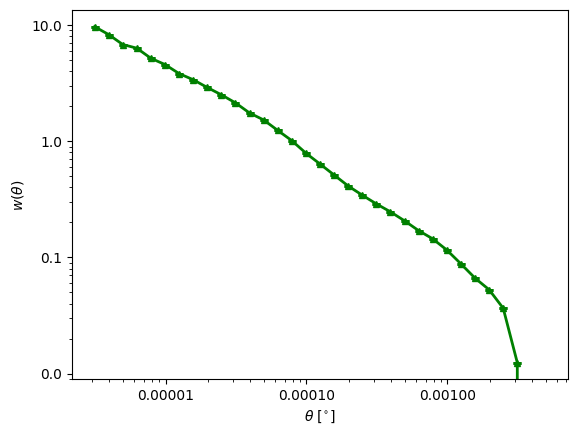

In [16]:
%%time
# DEFINE PARAMETERS  ==========================================================
par = gundam.packpars(kind='acf')
par.autogrid    = True        # Automatic SK grid size
par.doboot      = False        # Do bootstrap error estimates
par.mxh1        = 20          # SK size in dec
par.mxh2        = 100         # SK size in ra
par.mxh3        = 10          # SK size in z

par.dsept       = 0.10
par.nsept       = 33
par.septmin     = 0.01

par.estimator   = 'NAT'
par.description = 'example01' # Description label

# READ DATA FILES  ============================================================
print('Reading file: ', galf)
#gals = Table.read(galf)
gals = Table.read('/gundam/tests/data/DATA.fits')
gals = gals[['ra', 'dec']]
if 'wei' not in gals.colnames:  gals['wei'] = 1. #If not present, set weights to 1

print('Reading file: ', ranf)
#rans = Table.read(ranf)
rans = Table.read('/gundam/tests/data/RAND.fits')
rans = rans[['ra', 'dec']]
if 'wei' not in rans.colnames:  rans['wei'] = 1. #If not present, set weights to 1

#==============================================================================
# CALCULATE THE CORRELATION
nt  = 1   # Threads to use
cnt = gundam.acf(gals, rans, par, nthreads=nt, plot=True, write=False)
#==============================================================================

# TreeCorr

In [17]:
import treecorr

In [18]:
gals = Table.read('/gundam/tests/data/DATA.fits')
gals = gals[['ra', 'dec']]

rans = Table.read('/gundam/tests/data/RAND.fits')
rans = rans[['ra', 'dec']]

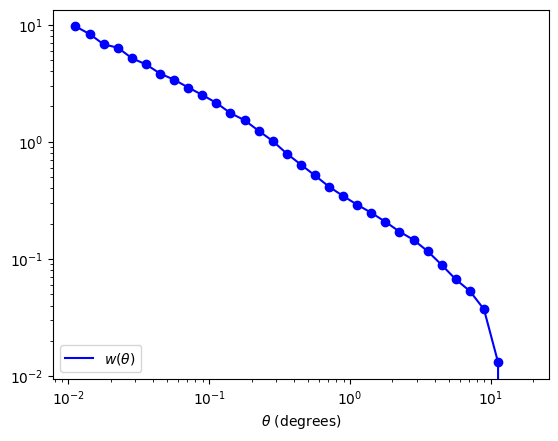

CPU times: user 26 s, sys: 244 ms, total: 26.3 s
Wall time: 25.4 s


In [19]:
%%time
bin_size_x = 0.23
cat = treecorr.Catalog(ra=gals['ra'].value, dec=gals['dec'].value, ra_units='degrees', dec_units='degrees')
dd = treecorr.NNCorrelation(nbins=33, min_sep=0.01, bin_size=bin_size_x,
                            bin_type="Log", sep_units='degrees', num_threads=1, bin_slop=0)
dd.process(cat)
rand = treecorr.Catalog(ra=rans['ra'].value, dec=rans['dec'].value, ra_units='degrees', dec_units='degrees')
rr = treecorr.NNCorrelation(nbins=33, min_sep=0.01, bin_size=bin_size_x,
                            bin_type="Log", sep_units='degrees', num_threads=1, bin_slop=0)
rr.process(rand)

xi, varxi = dd.calculateXi(rr=rr)

r = np.exp(dd.meanlogr)
plt.plot(r, xi, color='blue')
plt.scatter(r, xi, color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta$ (degrees)')
plt.legend([r'$w(\theta)$'], loc='lower left')
plt.show()

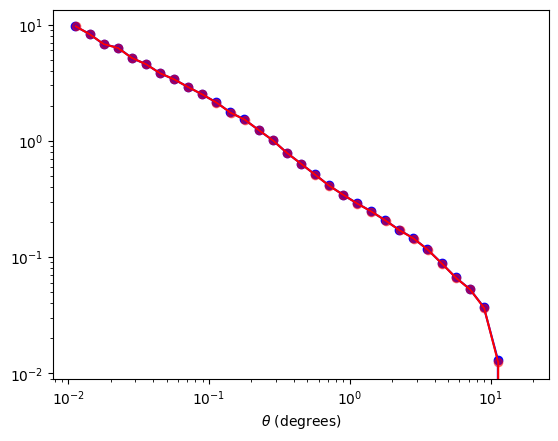

In [20]:
plt.plot(r, xi, color='blue')
plt.scatter(r, xi, color='blue')
plt.scatter(cnt.thm, cnt.wth, color='red', alpha=0.5)
plt.plot(cnt.thm, cnt.wth, color='red')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta$ (degrees)')

plt.show()